In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from all_in_one_topic_modelling import PipelineTopicModeling 
from importlib import reload
%load_ext autoreload
%autoreload 2

In [22]:
import pickle 
outdir = '/Users/jingweizhang/Documents/Projects/pandemic_risk/data/'
test_df = pd.read_csv(outdir + 'label_clean.csv')

In [23]:
risk_texts = test_df[test_df.label == 'RISK'].clean_text.tolist()
opp_texts = test_df[test_df.label == 'OPPORTUNITY'].clean_text.tolist()

In [26]:
risk_texts = [i for i in risk_texts if type(i) == str]

In [6]:
pltm_object1 = PipelineTopicModeling(text_data = opp_texts, 
                                    n_gram=2,
                                    tfcounter_type='bow',
                                    model_type='lda',
                                    topic_range_set = [8,20,1])

In [27]:
risk_object = PipelineTopicModeling(text_data = risk_texts, 
                                    n_gram=2,
                                    tfcounter_type='bow',
                                    model_type='lda',
                                    topic_range_set = [8,20,1])

In [5]:
pltm_object.model_saved

{5: <gensim.models.ldamodel.LdaModel at 0x12b46a710>,
 6: <gensim.models.ldamodel.LdaModel at 0x12ab6e0b8>,
 7: <gensim.models.ldamodel.LdaModel at 0x12b46a6d8>,
 8: <gensim.models.ldamodel.LdaModel at 0x12b46a5f8>,
 9: <gensim.models.ldamodel.LdaModel at 0x12b46a5c0>,
 10: <gensim.models.ldamodel.LdaModel at 0x12b46a518>,
 11: <gensim.models.ldamodel.LdaModel at 0x12b46a4e0>,
 12: <gensim.models.ldamodel.LdaModel at 0x12b46a4a8>,
 13: <gensim.models.ldamodel.LdaModel at 0x12b46a470>,
 14: <gensim.models.ldamodel.LdaModel at 0x12b46a3c8>,
 15: <gensim.models.ldamodel.LdaModel at 0x12b46a358>}

In [19]:
model_eval,topic_df = pltm_object1.get_evaluation_result(coherence_metric = 'c_v', 
                                                          distance_metric = 'cosine', 
                                                          document_score_threshold = 0.5, 
                                                          topn_eval = 30, 
                                                          topn_output = 30)

In [21]:
topic_df[topic_df.topic_number == 8].top_terms.tolist()

['use,pandemic,approve,patient,conduct,coronaviruse,specific,clinical,resource,treat,non,deploy,respiratory,virus,remdesivir,respiratory_syndrome,center,multiple,organization,know,chief,severe,severe_acute,lab,pre,determine,agency,study,include,tomi',
 'mask,protective,update,medical,supply,group,operation,staff,manufacturer,call,business,home,value,internet,situation,boost,user,online,image,maintain,distribute,basis,release,website,consultation,pay,science,supplier,give,supermarket',
 'company,novel,announce,development,research,clinical,technology,use,testing,rapid,produce,develop,group,expect,candidate,focus,update,response,immune,rapidly,platform,infectious_disease,virus,share,study,oral,start,press_release,strain,manufacturing',
 'say,virus,coronavirus,company,treatment,work,drug,patient,develop,potential,service,people,platform,program,new,infection,offer,therapy,response,cell,lead,disease,base,production,outbreak,currently,believe,plan,viral,result',
 'vaccine,antibody,human,dev

In [20]:
model_eval

,topic_number,coherence,distance_avg,distance_min,doc_distribution_max,doc_distribution_std,doc_unclassified_rate
0,8,0.356539,0.868451,0.855863,0.067503,0.026965,0.803465
1,9,0.401274,0.892522,0.854557,0.084229,0.027358,0.818399
2,10,0.415926,0.912361,0.877864,0.034648,0.013102,0.891278
3,11,0.425025,0.924501,0.879657,0.035842,0.012345,0.892473
4,12,0.436750,0.939963,0.900886,0.050777,0.015603,0.893070
5,13,0.425093,0.947671,0.904594,0.029869,0.008861,0.936081
6,14,0.409249,0.954834,0.896602,0.009558,0.002710,0.970729
7,15,0.393989,0.968553,0.941362,0.023297,0.006007,0.968339
8,16,0.406655,0.974304,0.948812,0.092593,0.023054,0.900836
9,17,0.420312,0.978630,0.972216,0.056750,0.013712,0.937873


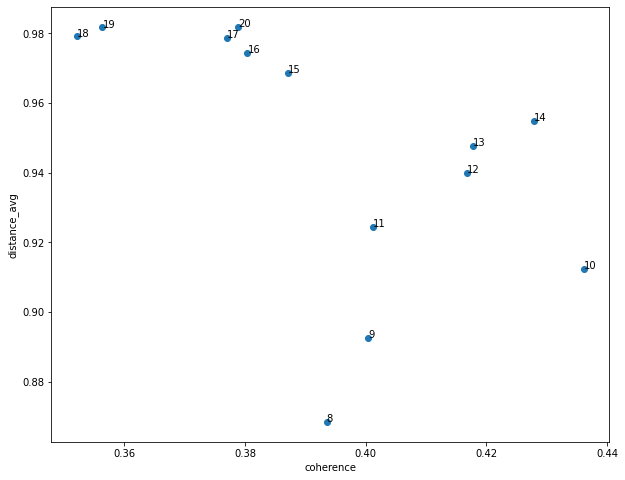

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
z = model_eval.coherence.tolist()
y = model_eval.distance_avg.tolist()
ax.scatter(z,y)
plt.xlabel('coherence')
plt.ylabel('distance_avg')
marker = model_eval.topic_number.tolist()
for i, txt in enumerate(marker):
    ax.annotate(txt, (z[i], y[i]))

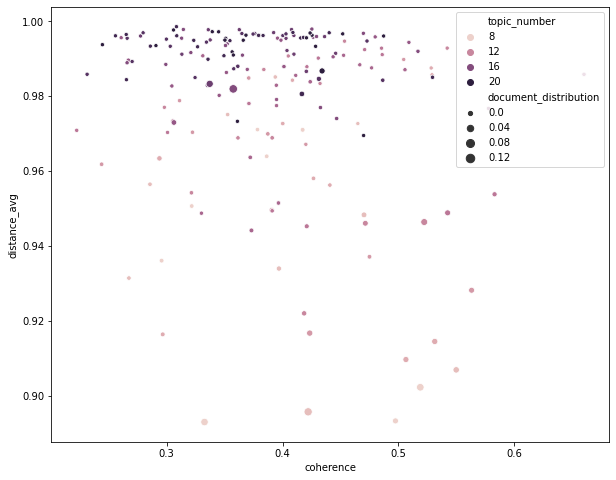

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="coherence", y="distance_avg", hue = 'topic_number', size="document_distribution", data=topic_df)

In [28]:
risk_model_eval,risk_topic_df = risk_object.get_evaluation_result(coherence_metric = 'c_v', 
                                                          distance_metric = 'cosine', 
                                                          document_score_threshold = 0.5, 
                                                          topn_eval = 30, 
                                                          topn_output = 30)

In [31]:
risk_topic_df[risk_topic_df.topic_number == 20].top_terms.tolist()

['hit,travel,restriction,member,concern,performance,lose,restrict,fear,rise,recovery,region,slowdown,look,defer,recent,grow,notice,expenditure,assume,extended,arrange,relation,spur,path,corporation,government,unit,firm,dividend',
 'accord,air,traffic,ceo,key,public,product,create,strong,live,goal,develop,well,volatility,momentum,solution,remark,promote,resolve,meet,unlikely,liquidity,dividend,tourism,report,stop,pay,propose,officer,programme',
 'expect,result,measure,financial,new,revenue,time,uncertainty,cause,start,rate,situation,announce,lead,cite,effect,base,negative,current,implement,temporary,period,like,area,range,previously,provide,show,possible,sign',
 'production,worker,government,factory,delay,place,project,facility,impose,test,output,extend,potential,slash,major,return,component,contract,closed,commodity,quickly,shortage,date,import,later,monitor,manufacturer,expose,protocol,present',
 'employee,close,store,temporarily,health,response,bank,authority,increase,confirm,relate,

In [33]:
risk_topic_df[risk_topic_df.topic_number == 8]

,topic_number,topic_index,top_terms,coherence,distance_avg,distance_min,document_distribution
0,8,1,"hit,staff,see,restriction,firm,project,ground,...",0.460587,0.990488,0.980917,0.000000
1,8,2,"employee,close,work,home,store,oil,temporarily...",0.435279,0.973536,0.909574,0.001005
2,8,3,"virus,spread,cost,include,world,measure,demand...",0.272458,0.965609,0.870251,0.004018
3,8,4,"update,flight,suspend,airline,lockdown,warn,ca...",0.355074,0.981263,0.93626,0.004018
4,8,5,"case,test_positive,bank,confirm,high,expectati...",0.585981,0.993221,0.98878,0.000000
5,8,6,"people,add,drop,postpone,tell,tourism,output,s...",0.508729,0.990393,0.984331,0.001005
6,8,7,"say,outbreak,coronavirus,company,impact,group,...",0.336454,0.951207,0.870251,0.083877
7,8,8,"cut,plant,market,country,global,crisis,dividen...",0.385497,0.978652,0.954218,0.000502


In [29]:
risk_model_eval

,topic_number,coherence,distance_avg,distance_min,doc_distribution_max,doc_distribution_std,doc_unclassified_rate
0,8,0.417507,0.909838,0.936823,0.083877,0.029168,0.905575
1,9,0.409363,0.909139,0.862281,0.026118,0.008422,0.962833
2,10,0.424646,0.947636,0.971662,0.137619,0.043484,0.861376
3,11,0.448038,0.939245,0.886131,0.007534,0.002595,0.983928
4,12,0.463512,0.949380,0.905065,0.002511,0.000984,0.992466
5,13,0.430617,0.968907,0.977299,0.013059,0.003595,0.984932
6,14,0.426325,0.970758,0.959595,0.005525,0.001493,0.992466
7,15,0.440226,0.976451,0.982529,0.082873,0.021372,0.915620
8,16,0.451140,0.971354,0.922508,0.007032,0.001758,0.992968
9,17,0.429557,0.979931,0.972864,0.043194,0.010476,0.956806
